# Análise Exploratória de Dados (EDA)

Oi! Neste notebook vou explorar os dados dos filmes para entender melhor as características deles, como a distribuição das notas, faturamento, gêneros e outras informações importantes para o desafio.
Vou fazer gráficos e análises simples para descobrir o que os dados mostram.


Nesse primeiro bloco de código eu importei as funções que criei para deixar o notebook mais limpo e organizado. Também carreguei os dados, limpei e criei colunas para facilitar a análise dos gêneros.

In [5]:
# Primeiro aqui eu importei as funções que criei no src para carregar e limpar os dados
import sys
sys.path.append('..\src')

from data_processing import load_and_clean_data
from feature_engineering import split_genres, extract_main_genre

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Aqui eu carreguei o arquivo csv da pasta data
df = load_and_clean_data('../data/desafio_indicium_imdb.csv')

# Aqui eu criei colunas novas para os gêneros
df = split_genres(df)
df = extract_main_genre(df)

# E aqui eu mostro as primeiras linhas para ver como ficou
df.head()


# Aviso: o Pandas mostra uma FutureWarning sobre o uso de inplace=True em colunas individuais.
# Como eu sou iniciante nessa área, optei por seguir dessa forma pois ainda funciona corretamente na versão atual.
# Mas tendo percebido esse aviso vou buscar de melhorar  o meu código para que futuramente ele não precise mais acontecer
# Tornando os meus futuros códigos a prova de versões futuras do pandas


C:\Users\Maria Eduarda\OneDrive\LH_CD_MARIAEDUARDATREVIZANEBUONAFINA\notebooks\..\src\data_processing.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Meta_score'].fillna(df['Meta_score'].median(), inplace=True)
C:\Users\Maria Eduarda\OneDrive\LH_CD_MARIAEDUARDATREVIZANEBUONAFINA\notebooks\..\src\data_processing.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never wo

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Genre_list,Main_Genre
0,1,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,"[Crime, Drama]",Crime
1,2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,"[Action, Crime, Drama]",Action
2,3,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0,"[Crime, Drama]",Crime
3,4,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0,"[Crime, Drama]",Crime
4,5,The Lord of the Rings: The Return of the King,2003,U,201,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0,"[Action, Adventure, Drama]",Action


Nesse próximo bloco eu criei um gráfico que mostra quantos filmes tem cada nota. 
O KDE ele ajuda a ver a curva da distribuição.

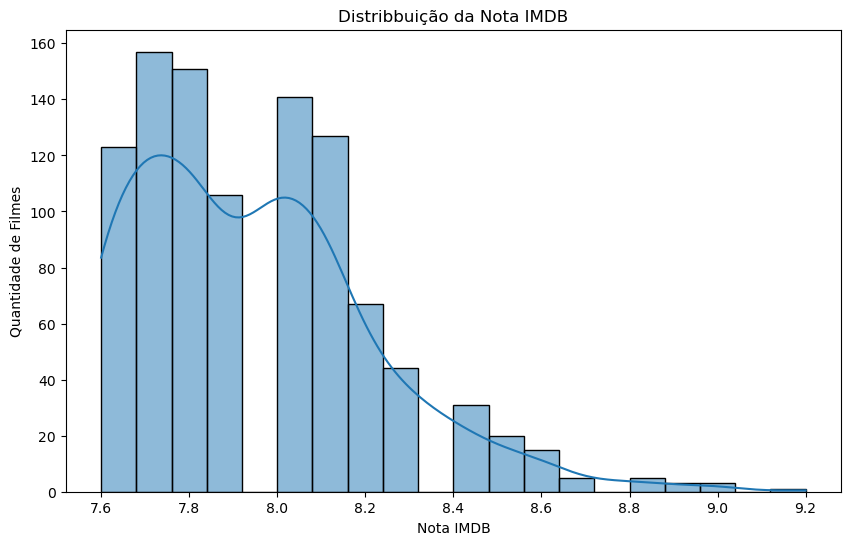

In [2]:
# Aqui eu fiz um gráfico ´para ver como as notas IMDB estão distribuídas

plt.figure(figsize=(10,6))
sns.histplot(df['IMDB_Rating'], bins=20, kde=True)
plt.title('Distribbuição da Nota IMDB')
plt.xlabel('Nota IMDB')
plt.ylabel('Quantidade de Filmes')
plt.show()

Nesse próximo bloco de código eu fiz esse gráfico que ajuda a entender quais gêneros costumam faturar mais, que é uma informação importante para a PProductions.

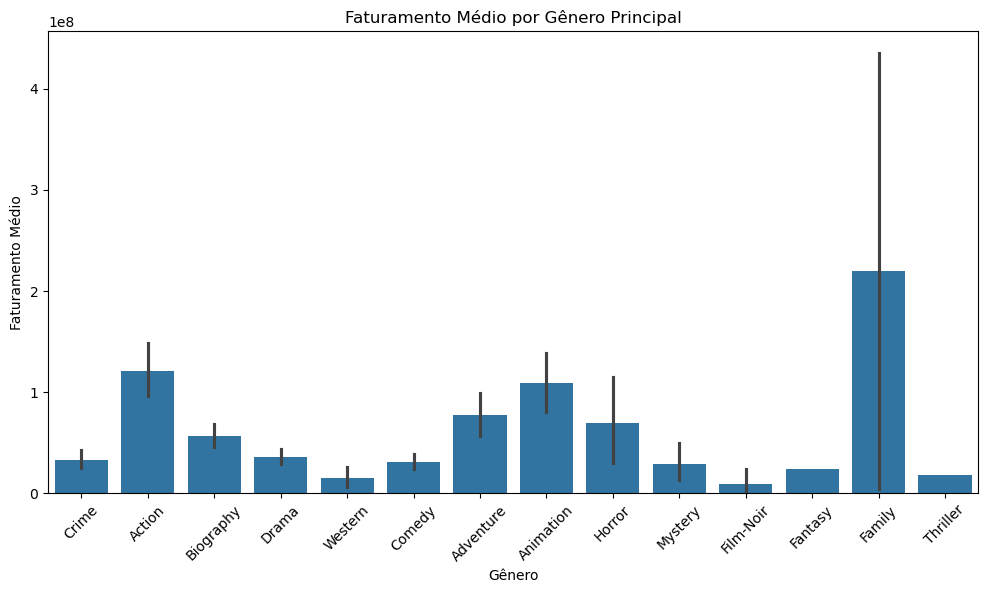

In [3]:
# Agora com esse código eu observei qual foi o faturamento médio para cada gênero principal

plt.figure(figsize=(12,6))
sns.barplot(x='Main_Genre', y='Gross', data=df)
plt.title('Faturamento Médio por Gênero Principal')
plt.xlabel('Gênero')
plt.ylabel('Faturamento Médio')
plt.xticks(rotation=45)
plt.show()


Nesse último bloco de código eu fiz esse gráfico que le mostra se filmes com maior nota tendem a faturar mais, ou se isso não tem muita relação.

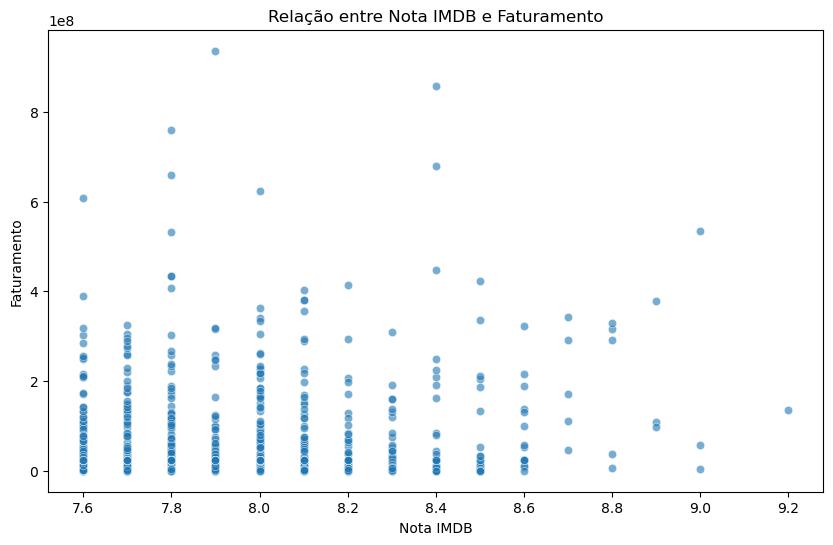

In [4]:
# Aqui eu fiz um gráfico de dispersão para ver se a nota e faturamento tem algum tipo de relação

plt.figure(figsize=(10,6))
sns.scatterplot(x='IMDB_Rating', y='Gross', data=df, alpha=0.6)
plt.title('Relação entre Nota IMDB e Faturamento')
plt.xlabel('Nota IMDB')
plt.ylabel('Faturamento')
plt.show()


# Conclusões preliminares

- A maioria dos filmes tem nota IMDB entre 6 e 8.
- Gêneros como Ação e Aventura parecem faturar mais, mas tem variação.
- A relação entre nota IMDB e faturamento existe, mas não é muito forte.
- Essas informações vão ajudar a escolher as váriáveis para o modelo de previsão.